# Задача

Уравнение теплопроводности:

$u_t = u_{xx} + u_{yy}$, где $x, y \in (0, 1);\ t \in (0, T)$

Краевые условия:

$u \big|_{t = 0} = \phi(x, y)$

$u \big|_\Gamma = g(x, y, t)$

Требуется: промоделировать температурное изменение пластины в зависимости от $\phi(x, y)$ и $g(x, y, t)$.

# Как будем решать?

составим сеточную схему с шагом $h$ (разбили $[0, 1]$ на $n$ частей) по осям $x, y$ и с шагом $\tau$ (разбили $[0, T]$ на $m$ частей) по $t$

будем считать

$
\newcommand{\u}[3]{u_{#1, #2}^{#3}}
\u{i}{j}{k} = u(x_i, y_j, t_k), \text{ где:}
$

$x_i = ih \text{ так, что } nh = 1$

$y_j = jh \text{ так, что } nh = 1$

$t_k = k\tau \text{ так, что } m\tau = T$

из краевых условий сразу знаем:

* $\u{i}{j}{0}\ \forall i, j$ (благодаря первому краевому условию)

* $\u{0}{j}{k}, \u{n}{j}{k}\ \forall j$ (благодаря второму краевому условию)

* $\u{i}{0}{k}, \u{i}{n}{k}\ \forall i$ (благодаря второму краевому условию)

переписать уравнение в виде разностной схемы:

$$
\frac{ \u{i}{j}{k + 1} - \u{i}{j}{k} }
     { h } =
\frac{ \u{i - 1}{j}{k} - 2\u{i}{j}{k} + \u{i + 1}{j}{k} }
     { \tau^2 } +
\frac{ \u{i}{j - 1}{k} - 2\u{i}{j}{k} + \u{i}{j + 1}{k} }
     { \tau^2 }
$$

Отсюда явно из $k$-го слоя выражается $k+1$-й слой (кроме слоя на границах, значения которых нам даёт второе граничное условие):

$\u{i}{j}{k + 1} = h\left[ 
\frac{ \u{i - 1}{j}{k} - 2\u{i}{j}{k} + \u{i + 1}{j}{k} }
     { \tau^2 } +
\frac{ \u{i}{j - 1}{k} - 2\u{i}{j}{k} + \u{i}{j + 1}{k} }
     { \tau^2 }
\right] + \u{i}{j}{k}\
\forall i, j \in \{1, 2, \dots, n - 1\}, k \in \{0, 1, \dots, m - 1\}$

А в остальных узнах:

$\u{i}{j}{0} = \phi(x_i, y_j)$

$\u{0}{j}{k} = g(0, y_j, t_k)$

$\u{n}{j}{k} = g(1, y_j, t_k)$

$\u{i}{0}{k} = g(x_i, 0, t_k)$

$\u{i}{n}{k} = g(x_i, 1, t_k)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
T = 0.01
field_size = 50
time_duration = 100
t = T / time_duration
h = 1 / field_size

u = np.zeros((field_size, field_size, int(T / t)))

In [3]:
def phi(x, y):
    return 1

def g(x, y, t):
    return 100

In [4]:
def solve():
    for k in range(0, int(T / t)):
        for i in range(field_size):
            for j in range(field_size):
                if k == 0:
                    u[i][j][k] = phi(i * h, j * h)
                elif i == 0 or i == field_size - 1 or j == 0 or j == field_size - 1:
                    u[i][j][k] = g(i * h, j * h, k * t)
                else:     
                    u[i][j][k] = t * ((u[i - 1][j][k - 1] - 2 * u[i][j][k - 1] + u[i + 1][j][k - 1]) / h ** 2 + \
                                + (u[i][j - 1][k - 1] - 2 * u[i][j][k - 1] + u[i][j + 1][k - 1]) / h ** 2) + u[i][j][k - 1]

KeyboardInterrupt: 

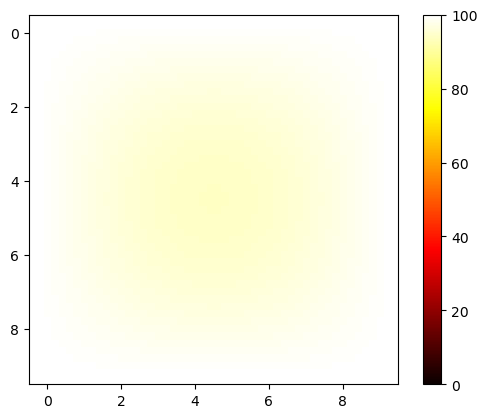

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Задаем параметры
frames = time_duration - 10  # Количество кадров анимации
interval = 100  # Интервал между кадрами в миллисекундах

# Создание фигуры и оси
fig, ax = plt.subplots()

data = np.random.rand(10, 10)

# Создание начальной тепловой карты
heatmap = ax.imshow(data, cmap='hot', interpolation='nearest', vmin = 0, vmax = 100)

# Функция обновления для анимации
k = 0
solve()

def update(frame):
    global k
    heatmap.set_array(u[:, :, k])
    k += 1
    return [heatmap]

plt.colorbar(heatmap)

# Создание анимации
ani = FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
ani.save("animation1_5.gif", writer=PillowWriter(fps=10))

